<a href="https://colab.research.google.com/github/jinrumiao/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_02%EF%BC%9A%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')


In [2]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 特徵解釋
1、fixed acidity：不易蒸發的酸

2、volatile acidity：揮發性的酸(醋酸)，過多的醋酸會導致品嘗經驗不佳

3、citric acid：檸檬酸，少量的檸檬酸可以為紅酒添加新鮮感及風味

4、residual sugar：發酵步驟停止後殘留的糖分，

5、chlorides：紅酒中的鹽分

6、free sulfur dioxide：游離二氧化硫，可以抑制微生物成長與氧化

7、total sulfur dioxide：游離二氧化硫以及二氧化硫總量，當游離二氧化硫大於50ppm時，嗅覺上會有明顯感受

8、density：密度，與水的密度差異，受紅酒中的酒精以及糖分影響

9、pH：酸鹼度，多數紅酒界於3到4之間

10、sulphates：硫酸鹽，微生物抑制劑、抗氧化劑

11、alcohol：酒精濃度

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use("ggplot")
sns.set_style("white")
matplotlib.rcParams["figure.figsize"] = 8, 6

In [5]:
def plot_distribution(df, var, target=None, **kwargs):
    row = kwargs.get("row", None)
    col = kwargs.get("col", None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, fill=True)
    # facet.set(xlim=(0, df[var].max()))
    facet.add_legend()


def plot_catecories(df, cat, target, **kwargs):
    row = kwargs.get("row", None)
    col = kwargs.get("col", None)
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()

In [6]:
colunms = df.columns
print(colunms[:-1])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


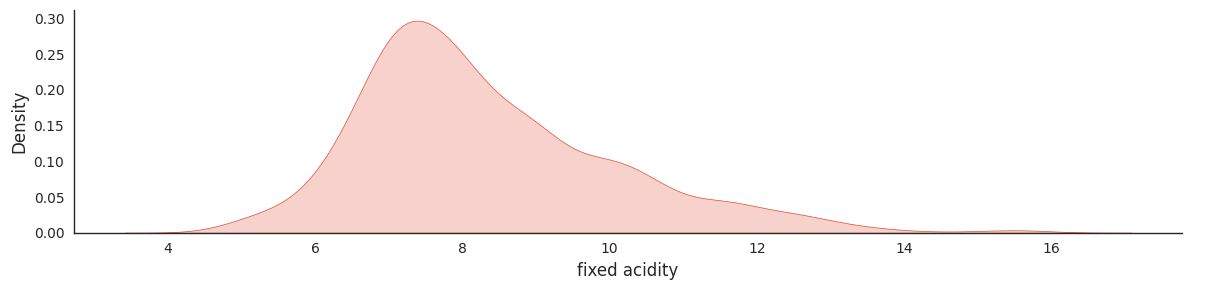

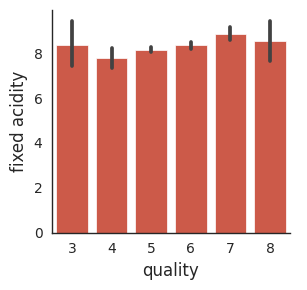

In [7]:
# 1、fixed acidity：不易蒸發的酸
plot_distribution(df, var="fixed acidity")
plot_catecories(df, cat="quality", target="fixed acidity")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


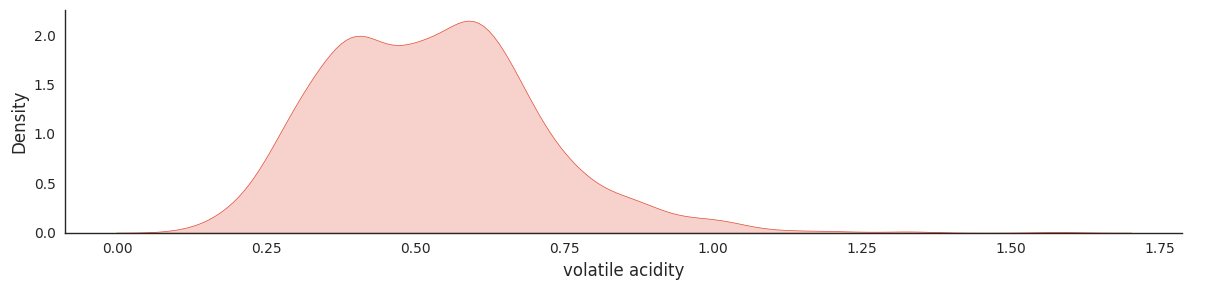

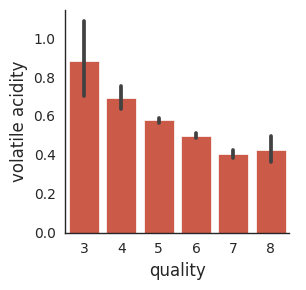

In [8]:
# 2、volatile acidity：揮發性的酸(醋酸)，過多的醋酸會導致品嘗經驗不佳
plot_distribution(df, var="volatile acidity")
plot_catecories(df, cat="quality", target="volatile acidity")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


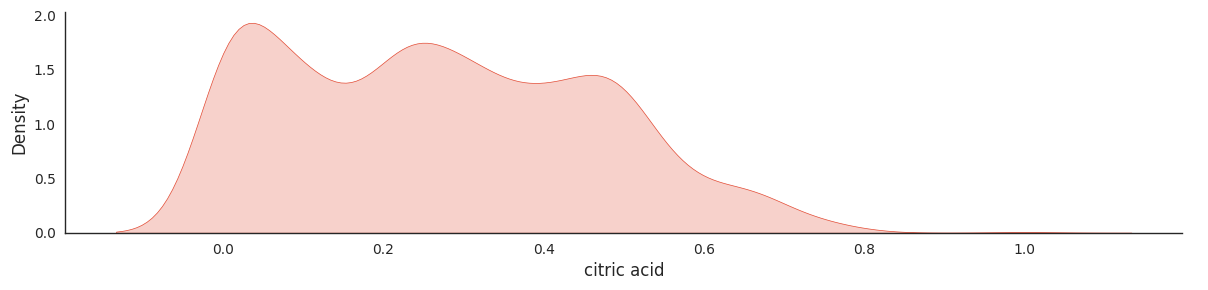

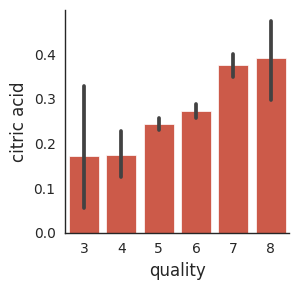

In [9]:
# 3、citric acid：檸檬酸，少量的檸檬酸可以為紅酒添加新鮮感及風味
plot_distribution(df, var="citric acid")
plot_catecories(df, cat="quality", target="citric acid")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


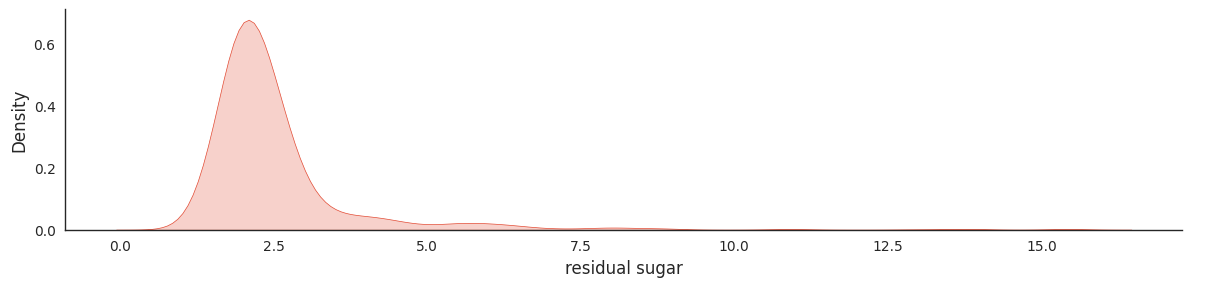

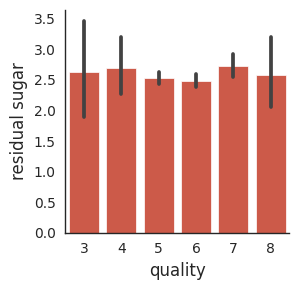

In [10]:
# 4、residual sugar：發酵步驟停止後殘留的糖分，很少有紅酒的糖度小於1 g/liter
plot_distribution(df, var="residual sugar")
plot_catecories(df, cat="quality", target="residual sugar")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


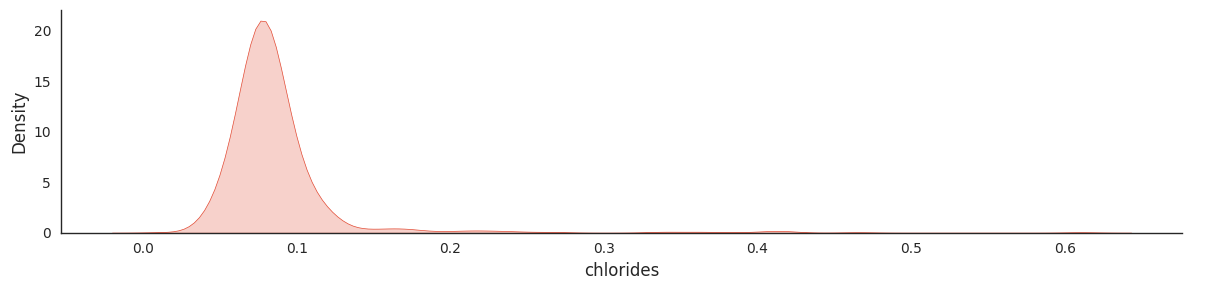

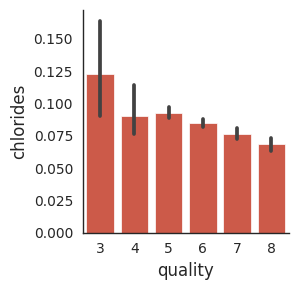

In [11]:
# 5、chlorides：紅酒中的鹽分
plot_distribution(df, var="chlorides")
plot_catecories(df, cat="quality", target="chlorides")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


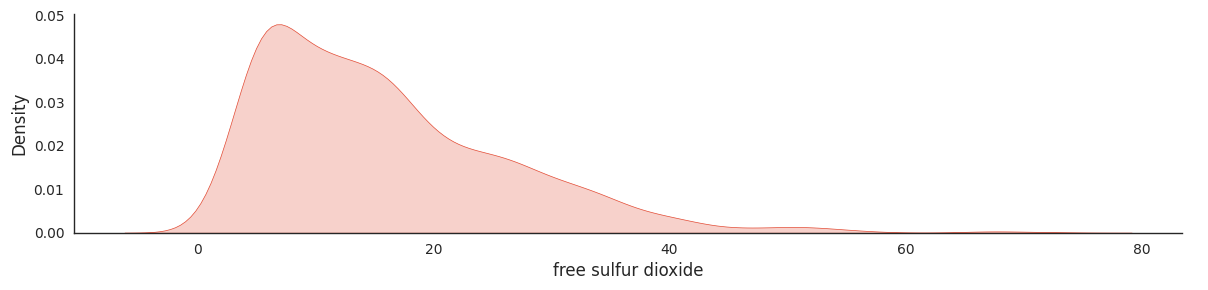

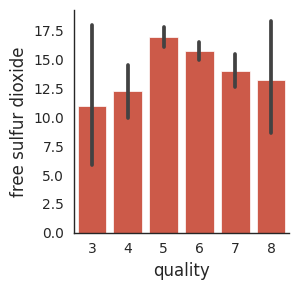

In [12]:
# 6、free sulfur dioxide：游離二氧化硫，可以抑制微生物成長與氧化
plot_distribution(df, var="free sulfur dioxide")
plot_catecories(df, cat="quality", target="free sulfur dioxide")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


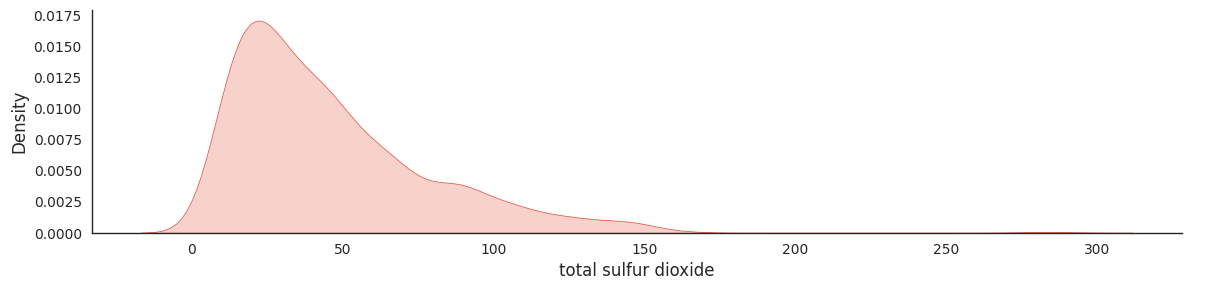

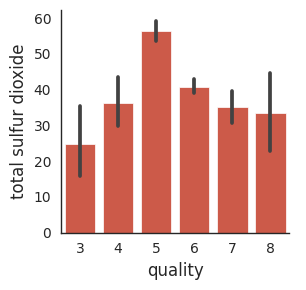

In [13]:
# 7、total sulfur dioxide：游離二氧化硫以及二氧化硫總量，當游離二氧化硫大於50ppm時，嗅覺上會有明顯感受
plot_distribution(df, var="total sulfur dioxide")
plot_catecories(df, cat="quality", target="total sulfur dioxide")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


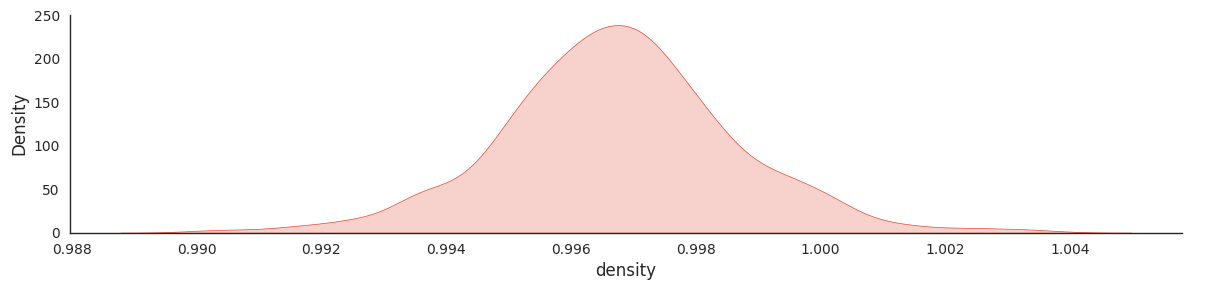

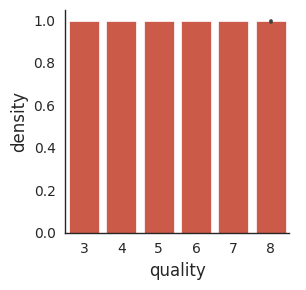

In [14]:
# 8、density：密度，與水的密度差異，受紅酒中的酒精以及糖分影響
plot_distribution(df, var="density")
plot_catecories(df, cat="quality", target="density")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


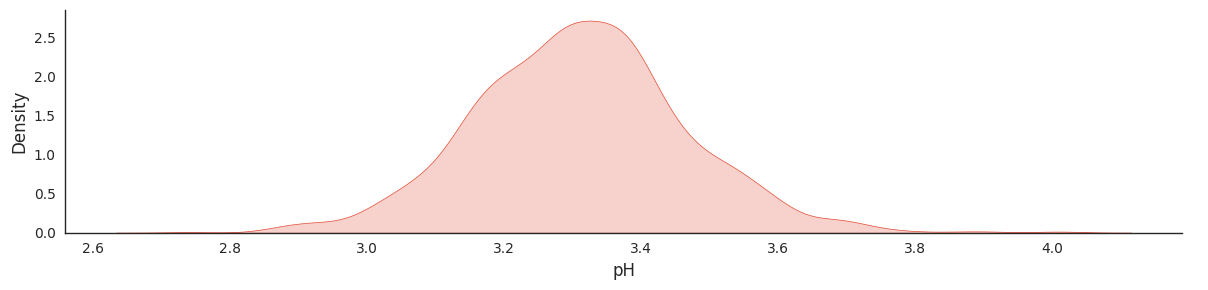

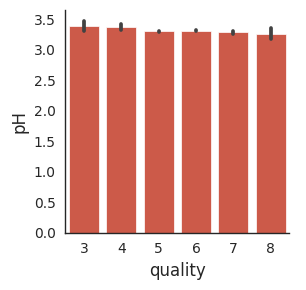

In [15]:
# 9、pH：酸鹼度，多數紅酒界於3到4之間
plot_distribution(df, var="pH")
plot_catecories(df, cat="quality", target="pH")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


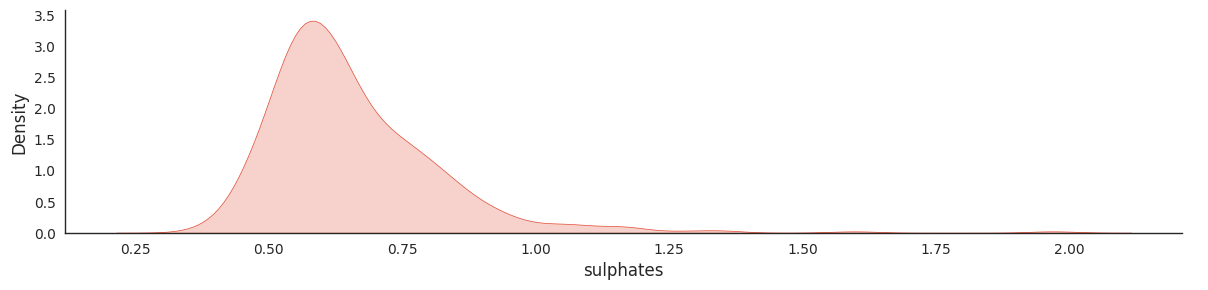

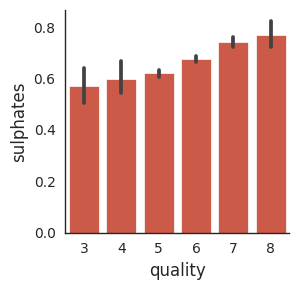

In [16]:
# 10、sulphates：硫酸鹽，微生物抑制劑、抗氧化劑
plot_distribution(df, var="sulphates")
plot_catecories(df, cat="quality", target="sulphates")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


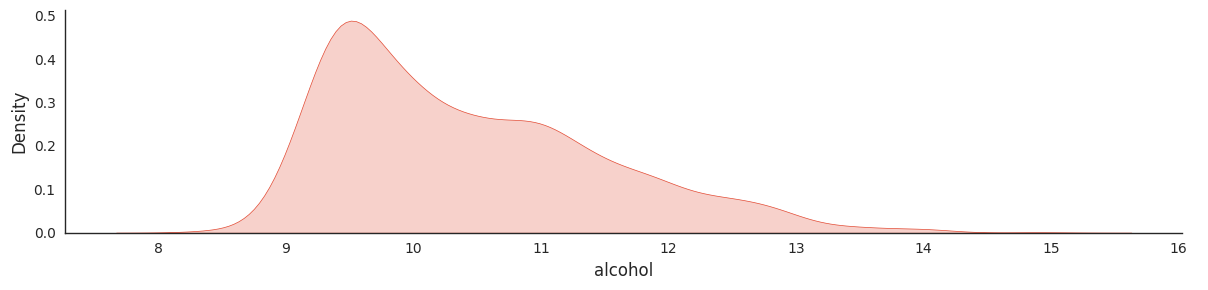

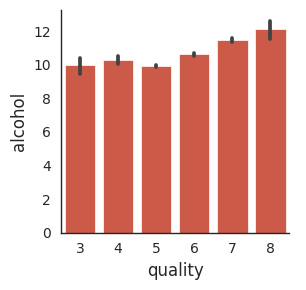

In [17]:
# 11、alcohol：酒精濃度
plot_distribution(df, var="alcohol")
plot_catecories(df, cat="quality", target="alcohol")

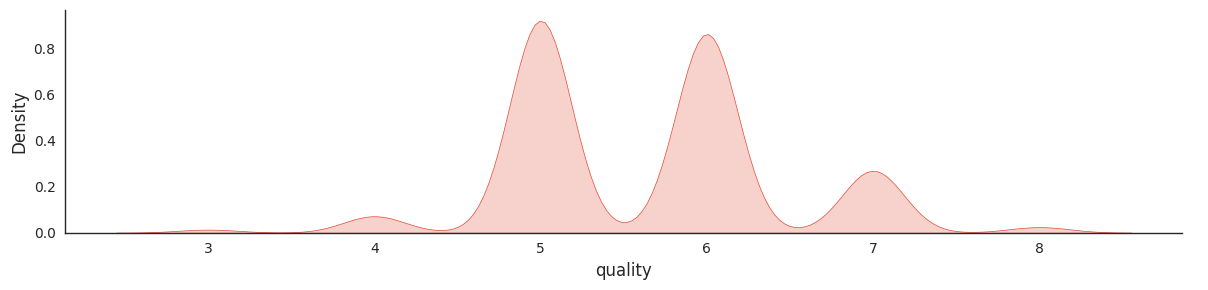

In [38]:
# 標籤資料分布
plot_distribution(df, var="quality")

<Axes: >

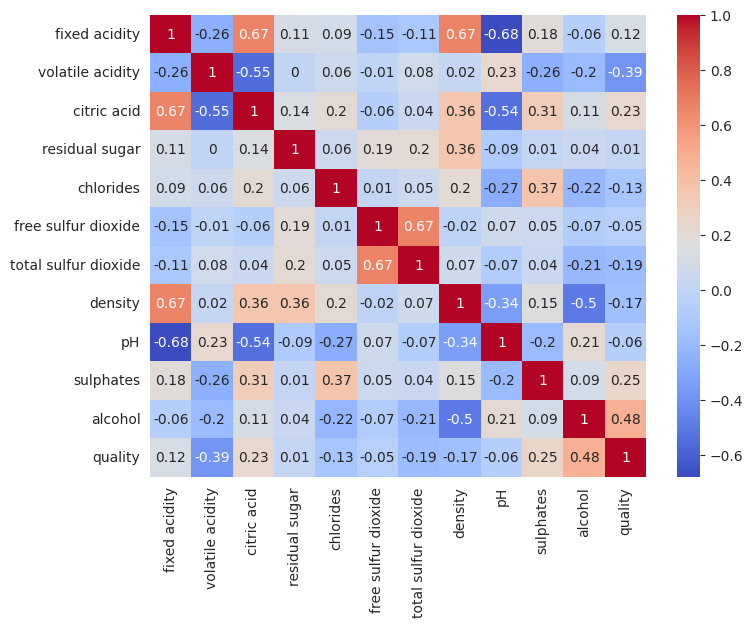

In [24]:
matrix = df.corr()
# print(matrix)

matrix = matrix.apply(lambda x: round(x, 2))

sns.heatmap(matrix, annot=True, cmap='coolwarm')

可以發現與quality相關性較高的特徵有：volatile acidity、citric acid、sulphates、alcohol